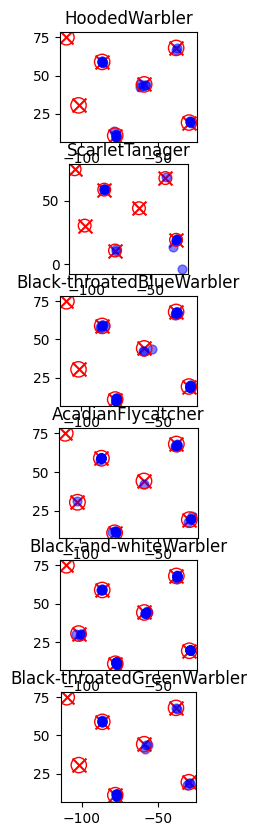

In [10]:
import pandas as pd
import matplotlib.pyplot as plt


# plot the speakers as large red crosses
speakers = pd.read_csv('./inputs/speaker_coords.csv')


# plot the recorders as black triangles
arus = pd.read_csv('./inputs/aru_coords.csv')

# plot the localized positions as blue dots
localized = pd.concat([pd.read_csv('./output_data/n2_t1_clustered_localizations.csv'), pd.read_csv('./output_data/n4_t1_clustered_localizations.csv')])
species = localized['species'].unique()
nrows = len(species)
ncols = 1
fig, axs = plt.subplots(nrows, ncols, figsize=(30, 10))

axs = axs.ravel()
for i, species in enumerate(species):
    spec_loc = localized[localized['species'] == species]
    ax = axs[i]
    ax.scatter(speakers['x'], speakers['y'], color='red', marker='x', label='Speakers', s=100)
    #ax.scatter(arus['x'], arus['y'], color='black', marker='^', label='Recorders', s=150)
    ax.scatter(spec_loc['x'], spec_loc['y'], color='blue', label='Localized positions', s=40, alpha=0.5)

    # draw red circles of 5m around the speakers
    for _, row in speakers.iterrows():
        ax.add_artist(plt.Circle((row['x'], row['y']), 5, color='red', fill=False))

    # ax.set_xlabel('Meters', fontsize=20)
    # ax.set_ylabel('Meters', fontsize=20)
    # ax.tick_params(axis='x', labelsize=20)
    # ax.tick_params(axis='y', labelsize=20)
    # ax.legend(fontsize=20)

    # save as png
    ax.set_aspect('equal')
    ax.set_title(species)
